# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = dict(file_cost=file_cost)

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
PM.review_portfolio('WTR')

{'strategy': 'WTR', 'universe': 'UV_WTR'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR', strategy=True)

{'method_select': 'Selected',
 'method_weigh': 'Equally',
 'file': 'pf_wtr_static',
 'path': 'transaction'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [8]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [9]:
WidgetUniverse

## K200

In [7]:
k200 = PM.create_universe('UV_K200')

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded


In [15]:
k200.portfolio_data
#k200.get_names()

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'tickers': 'KRX/INDEX/STOCK/1028',
   'daily': True,
   'path': 'data'},
  'name': 'UV_K200'}}

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
201 securities from 2021-01-04 to 2024-12-02 downloaded.
kospi200_prices_241202.csv saved
df_prices updated
Execution time of download: 38.96 secs


## KRX

In [12]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [ ]:
#krx.get_names()

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [19]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded


In [20]:
wtr.get_names()

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 379800: KODEX 미국S&P500TR
3) 411060: ACE KRX금현물
4) 148070: KOSEF 국고채10년
5) 284430: KODEX 200미국채혼합

In [21]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [22]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2021-01-04 to 2024-12-02 downloaded.
etfs_weather_241202.csv saved
df_prices updated
Execution time of download: 0.84 secs


In [21]:
#wtr.save()

## FCTR

In [17]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded


In [18]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [19]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

## FUND

In [4]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded


In [5]:
kw = dict(
    n_years=20, 
    close_today = WidgetUniverse.values(1),
    #tickers='selected'
)
fund.download(**kw) if WidgetUniverse.values(0) else None

In [6]:
fund.portfolio_data['universe']

{'data': {'universe': 'fund',
  'file': 'funds_prices',
  'tickers': 'funds_info',
  'daily': False,
  'path': 'data'},
 'name': 'UV_FUND'}

*create transaction_cost*

In [8]:
update = False

fd = FundDownloader.create(fund)
fd.export_cost('TDF', 'transaction_cost', path=path_tran, update=update)
#fd.export_cost('TDF')

Data for 64 funds loaded.
ERROR: transaction_cost.csv exists


## LIQ

In [23]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [24]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded


In [ ]:
#liq.get_names()

In [20]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.64it/s]

1.5 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2021-01-04 to 2024-11-28 downloaded.
krx_liq_prices_241128.csv saved
df_prices updated
Execution time of download: 2.16 secs


## Additional Data

### Financial Ratio

In [26]:
WidgetUniverse

In [27]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [28]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

In [29]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [30]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

201 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded


# Performance

In [4]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
pf_list = ['MMT', 'PER', 'WTR']
pm = PM(pf_list)

MMT:
201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

PER:
201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

WTR:
6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-20 loaded



In [6]:
pm.load('LIQ')
pm.load(['TDF','HANA'])

LIQ:
24 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded

TDF:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Transaction record to 2024-06-19 loaded

HANA:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Transaction record to 2024-07-31 loaded



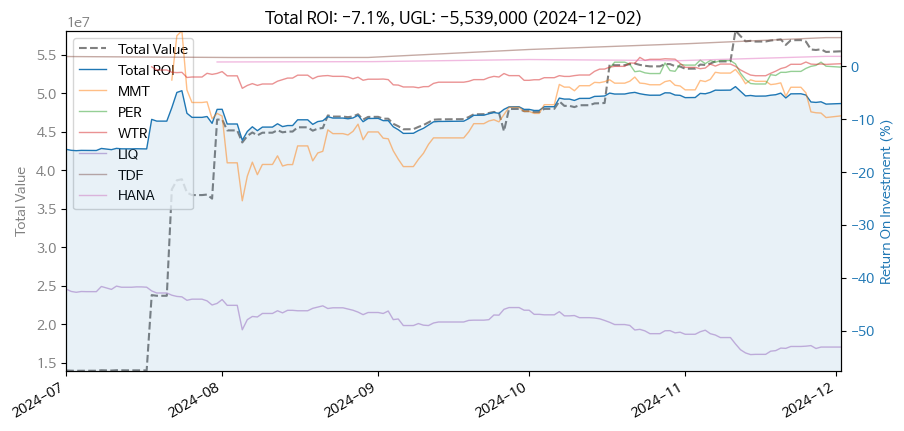

In [7]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date, roi=False)
pm.plot(start_date=start_date)

In [8]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [9]:
pm.valuate(date=w_date.value)

,MMT,PER,WTR,LIQ,TDF,HANA,Total
start,2024-07-22,2024-10-17,2024-07-18,2024-01-03,2024-06-19,2024-07-31,2024-01-03
date,2024-12-02,2024-12-02,2024-12-02,2024-11-28,2024-11-29,2024-11-29,2024-12-02
buy,29349501,12249820,10113935,6642078,9998969,9991314,78345617
sell,14322250,2621865,437755,0,0,0,17381870
value,12269100,9603980,9722580,3115318,10537856,10175837,55424671
UGL,-2758151,-23975,46400,-3526760,538887,184523,-5539076
ROI,-0.093976,-0.001957,0.004588,-0.530972,0.053894,0.018468,-0.070701


# Transaction

## MMT

In [10]:
pf_mmt = PM.create_portfolio('MMT', **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [11]:
pf_mmt.portfolio_data['strategy']

{'data': {'method_select': 'Momentum',
  'method_weigh': 'Equally',
  'sort_ascending': False,
  'n_tickers': 5,
  'lookback': '1y',
  'lag': '1w',
  'file': 'pf_k200_momentum',
  'path': 'transaction'},
 'name': 'MMT'}

In [12]:
pf_mmt.view_record(-2)

name   price  transaction  net  weight  weight*
date       ticker                                                         
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭  390000            0    8   0.200   0.2119
           012450     한화에어로스페이스  403500           -2    7   0.200   0.1918
           079550        LIG넥스원  266000            0   11   0.200   0.1987
           003230          삼양식품  563000           -1    5   0.200   0.1912
           064350          현대로템   63300           48   48   0.200   0.2064
           011790           SKC  122145          -20    0     NaN   0.0000

In [17]:
# run after editting record file
#_ = pf_mmt.update_record(save=True)

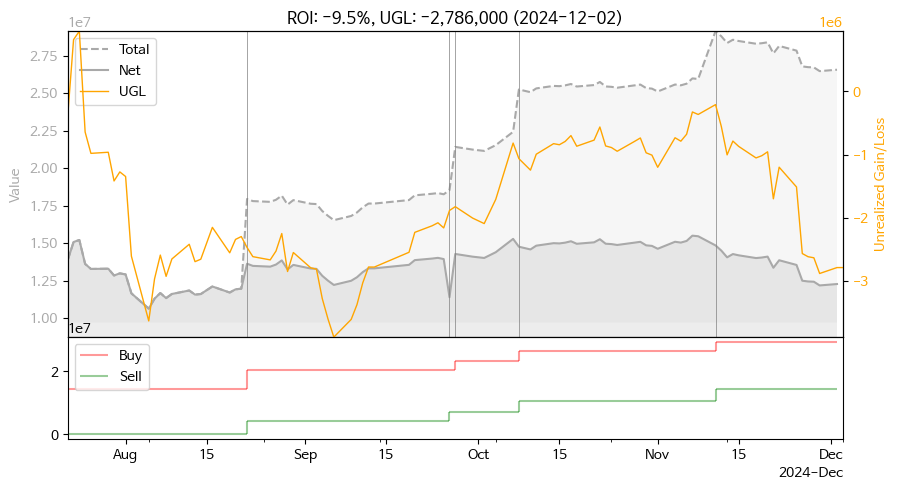

In [18]:
pf_mmt.plot(roi=False)

In [13]:
#pf_mmt.performance(metrics=METRICS)
#pf_mmt.cost
pf_mmt.valuate()

start    2024-07-22
date     2024-12-02
buy        29350569
sell       14295948
value      12269100
UGL        -2785521
ROI       -0.094905
dtype: object

In [34]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [35]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-11-27 to 2024-11-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 6 %
ROI: -8.8%, UGL: -2,793,000  (2024-12-02)
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       ticker                                                    
2024-11-11 267260   HD현대일렉트릭  390000            0    8    0.2  0.2119
           012450  한화에어로스페이스  403500           -2    7    0.2  0.1918
           079550     LIG넥스원  266000            0   11    0.2  0.1987
           003230       삼양식품  563000           -1    5    0.2  0.1912
           064350       현대로템   63300           48   48    0.2  0.2064
           011790        SKC  122145          -20    0    NaN     0.0
2024-12-02 267260   HD현대일렉트릭  335000           -1    7  0.200  0.2038
           012450  한화에어로스페이스  321000            0    7  0.200  0.1952
           079550     LIG넥스원  197500            1   12  0.200  0.2059
           000150         두산  194900           12   12  0.200  0.2032
           003230       삼양식품  552000           -1    4  0.200  0.1919
           064350       현대로템   50200          -48    0    NaN       0

### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_mmt.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [ ]:
pf_mmt.update_record()

## KRX
*simulation*

In [16]:
pf_krx = PM.create_portfolio('KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded
ERROR from get_names: '287410'
Transaction record to 2024-10-02 loaded


In [17]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

ROI -12.86%, Unrealized G/L -4,042,804 on 2024-10-08


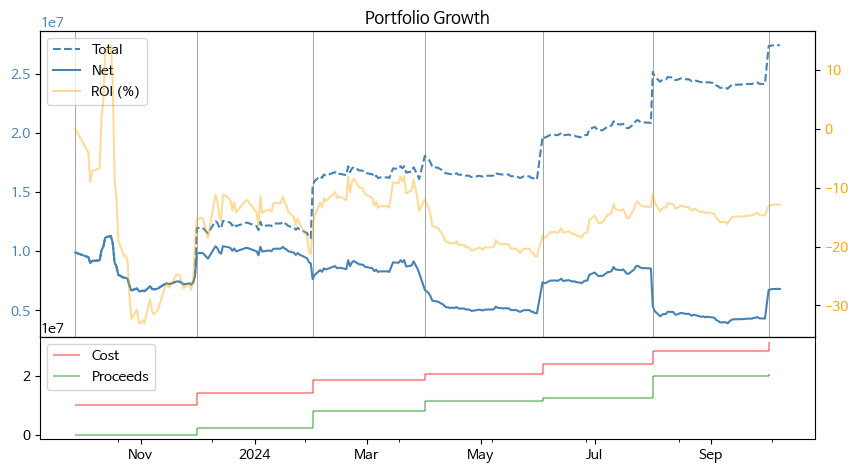

In [18]:
pf_krx.valuate()

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 4 %
ROI -12.80%, Unrealized G/L -4,042,804 on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860    None    9390            6   145  0.200  0.2079
           016670    None    4865           -6   280  0.200  0.2080
           033790    None    9040            2   150  0.200  0.2070
           196170    None  369000           -1     3  0.200  0.1690
           159910    None     734           79  1857  0.200  0.2081

## PER

In [14]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [19]:
pf_per = PM.create_portfolio('PER', df_additional=df_ratio, **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [16]:
#pf_per.portfolio_data

In [17]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [20]:
pf_per.valuate()

start    2024-10-17
date     2024-12-02
buy        12250265
sell        2617050
value       9603980
UGL          -29235
ROI       -0.002386
dtype: object

In [37]:
#pf_per.update_record()
#pf_per.view_record(-2)

Transaction dates updated for profit/loss on the dates


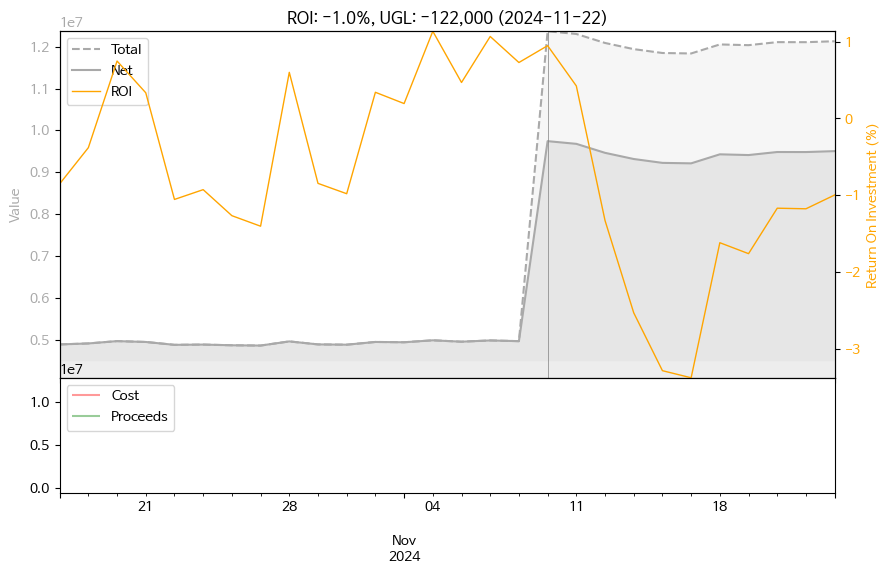

In [38]:
pf_per.plot()

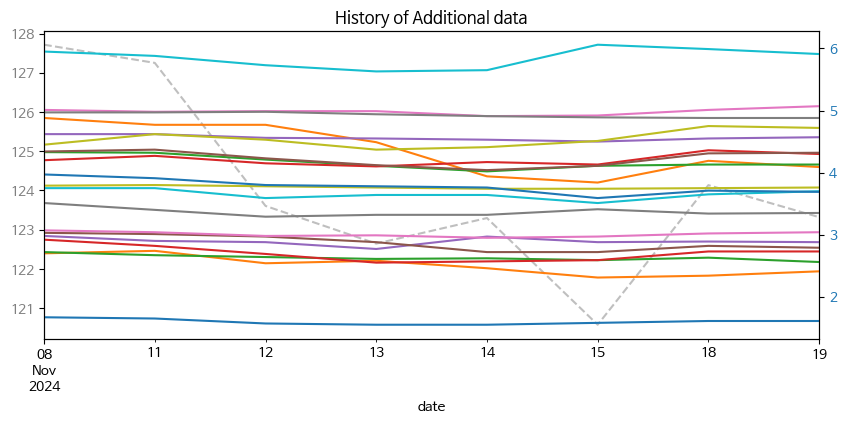

In [39]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

In [40]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [41]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
ERROR: no ratio for "['2024-11-20', '2024-11-21', '2024-11-22'] not in index"


name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [21]:
pf_wtr = PM.create_portfolio('WTR', **kw_cost)

6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-20 loaded


In [22]:
pf_wtr.portfolio_data['strategy']

{'data': {'method_select': 'Selected',
  'method_weigh': 'Equally',
  'file': 'pf_wtr_static',
  'path': 'transaction'},
 'name': 'WTR'}

Transaction dates updated for profit/loss on the dates


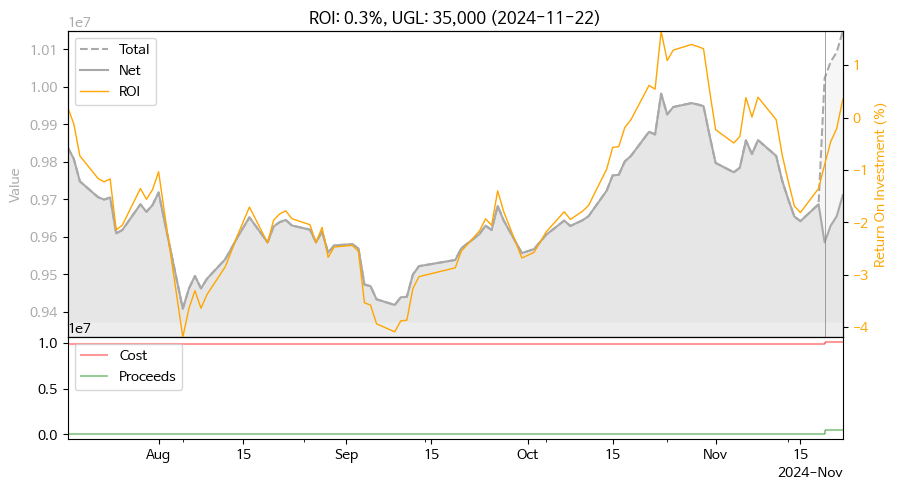

In [5]:
pf_wtr.plot()

In [6]:
pf_wtr.view_record(-2)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   
2024-11-20 069500             KODEX 200   33010            7   49   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14   0.167   
           148070          KOSEF 국고채10년  117035           -1   13   0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86   0.167   
           411060            ACE KRX금현물   17040          -10   96   0.167   
           284430        KODEX 200미국채혼합   12585            5  129   0.167   

                   weight*  
date       ticker           
2024-07-18 069500   0.1670  
           273130   0.1610  
           148070   0.1640  
           379800   0.1690  
           411060   0.1700  
           284430   0.1700  
2024-11-20 069500   0.1684  
           273130   0.1676  
           148070   0.1584  
           379800   0.1680  
           411060   0.1685  
           284430   0.1691

In [7]:
#pf_wtr.performance(metrics=METRICS)

In [8]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [9]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2)

Liquidation set to None
6 tickers selected by All from 2024-05-22 to 2024-11-22
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
Transaction dates updated for profit/loss on the dates
ROI: 0.3%, UGL: 35,000  (2024-11-22)
Set save=True to save transaction record


name   price  transaction  net weight  \
date       ticker                                                          
2024-11-20 069500             KODEX 200   33010            7   49  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14  0.167   
           148070          KOSEF 국고채10년  117035           -1   13  0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.167   
           411060            ACE KRX금현물   17040          -10   96  0.167   
           284430        KODEX 200미국채혼합   12585            5  129  0.167   
2024-11-22 069500             KODEX 200   33345           -1   48  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  115170            0   14  0.167   
           379800      KODEX 미국S&P500TR   19030           -1   85  0.167   
           411060            ACE KRX금현물   17350           -3   93  0.167   
           148070          KOSEF 국고채10년  117420            0   13  0.167   
           284430        KODEX 200미국채혼합   12685           -2  127  0.167   

                  weight*  
date       ticker          
2024-11-20 069500  0.1684  
           273130  0.1676  
           148070  0.1584  
           379800   0.168  
           411060  0.1685  
           284430  0.1691  
2024-11-22 069500  0.1670  
           273130  0.1683  
           379800  0.1688  
           411060  0.1684  
           148070  0.1593  
           284430  0.1681

## LIQ

In [49]:
pf_liq = PM.create_portfolio('LIQ')

24 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded


Transaction dates updated for profit/loss on the dates


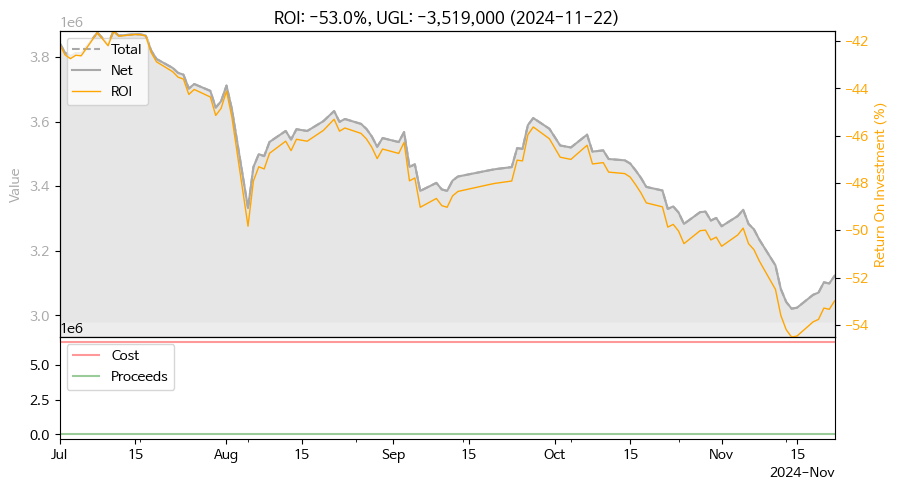

In [50]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [51]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## TDF

In [4]:
selected = ['K55301BU6139', 'K55206C95800']

In [5]:
pf_tdf = PM.create_portfolio('TDF', tickers=selected, **kw_cost)
pf_tdf.view_record(amount=True)

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


name  price  \
date       ticker                                                           
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1481   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1280   

                        transaction        net  weight  weight*  
date       ticker                                                
2024-06-19 K55301BU6139   4,998,375  4,998,375     0.5      0.5  
           K55206C95800   4,995,840  4,995,840     0.5      0.5

In [57]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

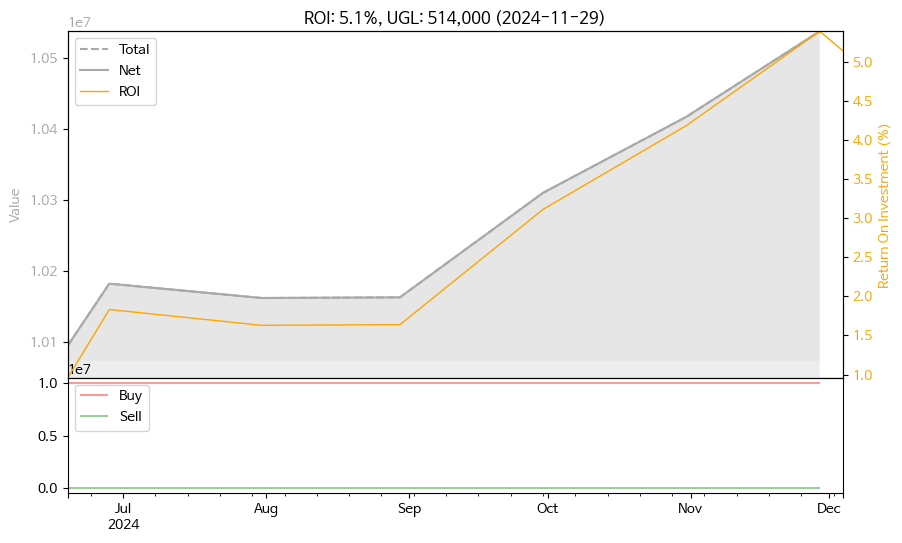

In [58]:
pf_tdf.plot()

In [27]:
pf_tdf.valuate()

start    2024-06-19
date     2024-11-29
buy         9998969
sell         -24815
value      10537856
UGL          514072
ROI        0.051413
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [10]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(amount=True)

Liquidation set to None
2 tickers selected by Selected from 2024-11-29 to 2024-11-29
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: -1.9%, UGL: -192,000  (2024-11-29)
Set save=True to save transaction record


name  price  \
date       ticker                                                           
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   
2024-11-29 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1533   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1373   

                        transaction        net weight weight*  
date       ticker                                              
2024-06-19 K55301BU6139   4,995,540  4,995,540    0.5     0.5  
           K55206C95800   4,999,119  4,999,119    0.5     0.5  
2024-11-29 K55301BU6139     110,376  4,911,732  0.500  0.5000  
           K55206C95800    -111,213  4,909,848  0.500  0.5000

### Convert transaction

In [11]:
pf_tdf.view_record()

name  price  \
date       ticker                                                           
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1481   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1280   

                         transaction   net  weight  weight*  
date       ticker                                            
2024-06-19 K55301BU6139      5000000  3132     0.5      0.5  
           K55206C95800      5000000  3657     0.5      0.5

In [12]:
pf_tdf.convert_transaction()

Transaction record to 2024-06-19 loaded
Actual weights updated
Transaction file pf_tdf_static_240619.csv updated
self.record updated


name    price  \
date       ticker                                                             
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e  1481.31   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)  1280.95   

                         transaction   net  weight weight*  
date       ticker                                           
2024-06-19 K55301BU6139         3375  3375     0.5  0.5000  
           K55206C95800         3903  3903     0.5  0.5000

## HANA

In [59]:
selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']

In [60]:
pf_hana = PM.create_portfolio('HANA', tickers=selected, **kw_cost)
pf_hana.view_record(amount=True)

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-08-01 loaded


name  price  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1267   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1132   

                        transaction        net  weight  weight*  
date       ticker                                                
2024-08-01 KR5101888398   5,016,396  5,016,396   0.502   0.5026  
           KR5236AS4826   2,417,436  2,417,436   0.242   0.2422  
           KR5370AP9956   1,859,395  1,859,395   0.186   0.1862  
           K55306CV9946     689,388    689,388   0.069   0.0690

In [61]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

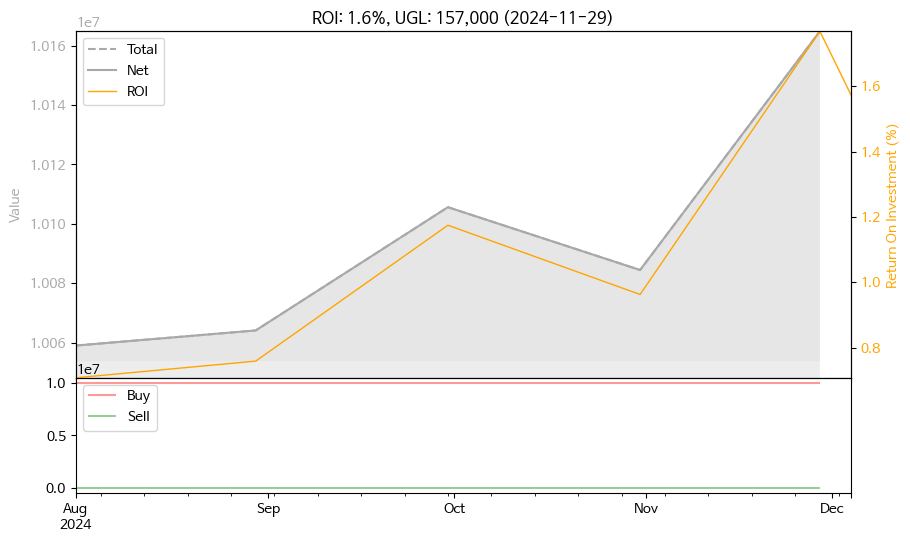

In [62]:
pf_hana.plot()

In [8]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [9]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record(amount=True)

Liquidation set to None
4 tickers selected by Selected from 2022-10-31 to 2024-10-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
Transaction dates updated for profit/loss on the dates
ROI: 1.0%, UGL: 104,000  (2024-10-31)
Set save=True to save transaction record


name  price  \
date       ticker                                                       
2024-07-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   
2024-10-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1080   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1268   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1311   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1132   

                         transaction   net weight weight*  
date       ticker                                          
2024-07-31 KR5101888398         4699  4699  0.502   0.502  
           KR5236AS4826         1920  1920  0.242   0.242  
           KR5370AP9956         1448  1448  0.186   0.186  
           K55306CV9946          602   602  0.069   0.069  
2024-10-31 KR5101888398         -310  4389  0.470  0.4700  
           KR5236AS4826           36  1956  0.246  0.2459  
           KR5370AP9956           26  1474  0.192  0.1916  
           K55306CV9946          223   825  0.093  0.0926

### Convert transaction

In [54]:
pf_hana.view_record()

name  price  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1267   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1132   

                         transaction   net  weight  weight*  
date       ticker                                            
2024-08-01 KR5101888398         4697  4697   0.502   0.5026  
           KR5236AS4826         1908  1908   0.242   0.2422  
           KR5370AP9956         1447  1447   0.186   0.1862  
           K55306CV9946          609   609   0.069   0.0690

In [44]:
pf_hana.convert_transaction(save=False)

Transaction record to 2024-08-01 loaded
Actual weights updated
Transaction file pf_hana_static_240731.csv updated
self.record updated


name    price  \
date       ticker                                                         
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)  1068.75   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E  1267.87   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce  1285.23   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce  1132.25   

                         transaction   net  weight weight*  
date       ticker                                           
2024-08-01 KR5101888398         4697  4697   0.502  0.5026  
           KR5236AS4826         1908  1908   0.242  0.2422  
           KR5370AP9956         1447  1447   0.186  0.1862  
           K55306CV9946          609   609   0.069  0.0690

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader, PortfolioBuilder
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = dict(file_cost=file_cost)

In [4]:
from pf_utils import set_filename, get_file_latest, Liquidation, BacktestManager, get_date_minmax, CostManager, format_rounded_string
import os
import pandas as pd
import numpy as np
from datetime import datetime

## PortfolioBuilder

In [40]:
class PortfolioBuilder():
    def __init__(self, df_universe, file=None, path='.', name='portfolio',
                 method_select='all', sort_ascending=False, n_tickers=0, lookback=0, lag=0, tickers=None, 
                 method_weigh='Equally', weights=None, lookback_w=None, lag_w=None, weight_min=0,
                 df_additional=None, security_names=None, 
                 cols_record = {'date':'date', 'tkr':'ticker', 'name':'name',
                                'trs':'transaction', 'net':'net', 'wgt':'weight', 'wgta':'weight*'},
                 date_format='%Y-%m-%d', cost=None
                ):
        """
        file: file of transaction history. 
              Do not update the ticker prices with the actual purchase price, 
               as the new df_universe may be adjusted with updated prices after the purchase.
        method_select: 'all', 'selected' for static, 'momentum', 'k-ratio', 'f-ratio' for dynamic
        lookback_w, lag_w: for weigh. reuse those for select if None
        sort_ascending: set to False for momentum & k-ratio, True for PER of f-ratio
        security_names: dict of ticker to name
        """
        self.df_universe = df_universe
        # set temp name for self._load_transaction
        file = set_filename(file, default='tmp.csv')
        file = self._retrieve_transaction_file(file, path)
        self.file = file
        self.path = path
        
        self.method_select = method_select
        self.sort_ascending = sort_ascending
        self.n_tickers = n_tickers
        self.lookback = lookback # period for select
        self.lag = lag # days
        self.tickers = tickers # see select
        self.method_weigh = method_weigh
        self.weights = weights
        self.lookback_w = self._check_var(lookback_w, self.lookback) # for weigh
        self.lag_w = self._check_var(lag_w, self.lag)
        self.weight_min = weight_min
        self.df_additional = df_additional
        self.security_names = security_names
        self.name = name # portfolio name
        self.cols_record = cols_record
        self.date_format = date_format # date str format for record & printing
        self.cost = cost # dict of buy/sell commissions, fee and tax. see CostManager
        
        self.selected = None # data for select, weigh and allocate
        self.df_rec = None # record updated with new transaction
        self.liquidation = Liquidation() # for instance of Liquidation
        self.record = self.import_record()
            

    def import_record(self, record=None, print_msg=True):
        """
        read record from file and update transaction dates
        """
        if record is None:
            record = self._load_transaction(self.file, self.path, print_msg=print_msg)
        if record is None:
            print('REMINDER: make sure this is 1st transaction as no records provided')
        return record


    def select(self, date=None, method=None, sort_ascending=None, 
               n_tickers=None, lookback=None, lag=None, tickers=None,  
               df_additional=None):
        """
        date: transaction date
        method: all, selected, momentum, k-ratio, f-ratio
        tickers: list of tickers in the universe
        df_additional: ex) df_ratio for f-ratio method
        """
        method = self._check_var(method, self.method_select)
        n_tickers = self._check_var(n_tickers, self.n_tickers)
        lookback = self._check_var(lookback, self.lookback)
        lag = self._check_var(lag, self.lag)
        tickers = self._check_var(tickers, self.tickers)
        sort_ascending = self._check_var(sort_ascending, self.sort_ascending)
        df_additional = self._check_var(df_additional, self.df_additional)

        if (n_tickers is not None) and (tickers is not None):
            if n_tickers > len(tickers):
                return print('ERROR: n_tickers greater than length of tickers')
        
        # search transaction date from universe
        kwa = dict(date=date, tickers=tickers)
        date = self._get_data(0, 0, **kwa).index.max()
        df_data = self._get_data(lookback, lag, **kwa)
        dts = get_date_minmax(df_data, self.date_format)
        info_date = f'from {dts[0]} to {dts[1]}'
        
        cond = lambda x,y: False if x is None else x.lower() == y.lower()
        if cond(method, 'k-ratio'):
            rank = (df_data.pct_change(1).apply(lambda x: calc_kratio(x.dropna()))
                    .sort_values(ascending=sort_ascending)[:n_tickers])
            method = 'K-ratio'
        elif cond(method, 'f-ratio'):
            if df_additional is None:
                return print('ERROR: no df_additional available')

            try:
                dts = df_data.index.strftime(self.date_format) # cast to str for err msg
                stat = df_additional.loc[dts].mean()
            except KeyError as e:
                return print(f'ERROR: no ratio for {e}')
                
            stat = stat.loc[stat > 0]
            if len(stat) == 0:
                return print('ERROR: check df_additional')
            
            rank = stat.sort_values(ascending=sort_ascending)[:n_tickers]
            if rank.index.difference(df_data.columns).size > 0:
                print('ERROR: check selected tickers if price data given')
            method = 'Financial Ratio'
        elif cond(method, 'momentum'):
            #rank = bt.ffn.calc_total_return(df_data).sort_values(ascending=False)[:n_tickers]
            # no difference with calc_total_return as align_axis=1
            rank = (df_data.apply(lambda x: x.dropna().iloc[-1]/x.dropna().iloc[0]-1)
                    .sort_values(ascending=sort_ascending)[:n_tickers])
            method = 'Total return'
        else: # default all for static
            rank = pd.Series(1, index=df_data.columns)
            n_tickers = rank.count()
            method = 'All' if tickers is None else 'Selected'
                
        tickers = rank.index
        self.selected = {'date': date, 'tickers': tickers, 'rank': rank} 
        print(f'{n_tickers} tickers selected by {method} {info_date}')
        return rank    

    
    def weigh(self, method=None, weights=None, lookback=None, lag=None, weight_min=None, **kwargs):
        """
        method: ERC, InvVol, Equally, Specified
        weights: str, list of str, dict, or None. Used only for 'Specified' method
        weight_min: min weight for every equity. not work with method specified or equal weights
        """
        selected = self.selected
        method = self._check_var(method, self.method_weigh)
        weights = self._check_var(weights, self.weights)
        lookback = self._check_var(lookback, self.lookback_w)
        lag = self._check_var(lag, self.lag_w)
        weight_min = self._check_var(weight_min, self.weight_min)
        
        if selected is None:
            return print('ERROR')
        else:
            date = selected['date']
            tickers = selected['tickers']

        df_data = self._get_data(lookback, lag, date=date, tickers=tickers)
        cond = lambda x,y: False if x is None else x.lower() == y.lower()
        if cond(method, 'erc'):
            weights = bt.ffn.calc_erc_weights(df_data.pct_change(1).dropna(), **kwargs)
            method = 'ERC'
        elif cond(method, 'invvol'):
            weights = bt.ffn.calc_inv_vol_weights(df_data.pct_change(1).dropna())
            method = 'Inv.Vol'
        elif cond(method, 'meanvar'):
            weights = bt.ffn.calc_mean_var_weights(df_data.pct_change(1).dropna(), **kwargs)
            method = 'MeanVar'
        elif cond(method, 'specified'):
            w = self._check_weights(weights, df_data, none_weight_is_error=True)
            if w is None:
                return self.liquidation.check_weights(weights)
            weights = {x:0 for x in tickers}
            weights.update(w)
            weights = pd.Series(weights)
            method = 'Specified'
            weight_min = 0
        else: # default equal. no need to set arg weights
            weights = {x:1/len(tickers) for x in tickers}
            weights = pd.Series(weights)
            method = 'Equal weights'
            weight_min = 0

        if weight_min > 0: # drop equities of weight lt weight_min
            w = redistribute_weights(weights, weight_min, n_min=1, none_if_fail=True)
            weights = pd.Series(0, index=weights.index) if w is None else pd.Series(w)

        
        self.selected['weights'] = np.round(weights, 4) # weights is series
        print(f'Weights of tickers determined by {method}.')
        return weights
        

    def allocate(self, capital=10000000, commissions=0, int_share=True):
        """
        calc number of each security with price and weights
        capital: rebalance tickers without cash flows if set to 0
        commissions: percentage
        """
        cols_record = self.cols_record
        col_date = cols_record['date']
        col_tkr = cols_record['tkr']
        col_net = cols_record['net']
        col_wgt = cols_record['wgt']
        col_wgta = cols_record['wgta']
        col_name = cols_record['name']
        # column transaction being included in transaction step
        cols_all = [col_name, col_net, col_wgt, col_wgta]
        col_prc = 'price'
        
        security_names = self.security_names
        selected = self.selected
        if selected is None:
            return print('ERROR')
        
        try:
            date = selected['date']
            weights = selected['weights']
            tickers = selected['tickers']
        except KeyError as e:
            return print('ERROR')

        # sum capital and security value
        record = self.record
        if record is None:
            if capital == 0:
                return print('ERROR: Neither capital nor tickers to rebalance exists')
        else:
            msg = 'WARNING: No rebalance as no new transaction'
            if self.check_new_transaction(date, msg):
                # the arg capital is now cash flows
                print(f'New cash inflows of {capital:,}' ) if capital>0 else None
                self.df_rec = None # reset df_rec to calc capital
                sr = self.valuate(date, print_msg=False)
                capital += sr['value'] # add porfolio value to capital

        # calc amount of each security by weights and capital
        df_prc = self.df_universe
        wi = pd.Series(weights, name=col_wgt).rename_axis(col_tkr) # ideal weights
        wvi = wi * capital / (1+commissions/100) # weighted security value

        if int_share:
            df_net = wvi / df_prc.loc[date, tickers] # stock quantity float
            df_net = df_net.rename(col_net).rename_axis(col_tkr) # missing index name in some cases
            # floor-towards-zero for int shares of buy or sell
            df_net = df_net.apply(np.fix).astype(int)
            df_net = (df_prc.loc[date].to_frame(col_prc).join(df_net, how='right')
                      .apply(lambda x: x[col_prc] * x[col_net], axis=1) # calc amount from int shares
                      .to_frame(col_net).assign(**{col_date: date}))
            # index is multiindex of date and security
            df_net = df_net.set_index(col_date, append=True).swaplevel().loc[:, col_net]
            
            # calc error between ideal and actual weights of tickers 
            wva = df_net.rename(col_wgta) # actual value of each security
            mae = (wva.loc[wva != 0] # drop tickers of zero weight for mae
                      .to_frame().join(wvi)
                      .apply(lambda x: x[col_wgta]/x[col_wgt] - 1, axis=1).abs().mean() * 100)
            print(f'Mean absolute error of weights: {mae:.0f} %')
        
            # add weights as new cols
            wa = self.calc_weight_actual(df_net)
        else:
            df_net = wvi
            wa = wi

        df_net = df_net.to_frame().join(wi).join(wa)
        df_net = df_net.loc[df_net[col_net]>0] # drop equities of zero net
        if len(df_net) == 0:
            return print('ERROR: No allocation at all')

        # add security names
        if security_names is None:
            df_net[col_name] = None
        else:
            df_net = df_net.join(pd.Series(security_names, name=col_name), on=col_tkr)
            
        return df_net[cols_all]


    def calc_weight_actual(self, sr_net, decimals=4):
        """
        sr_net: net of transaction record
        """
        cols_record = self.cols_record
        col_date = cols_record['date']
        col_wgta = cols_record['wgta']
        sr_w = sr_net.rename(col_wgta)
        sr_w = sr_w / sr_w.groupby(col_date).sum()
        return sr_w.round(decimals)


    def transaction(self, df_net, record=None):
        """
        add new transaction to records
        df_net: output of self.allocate
        record: transaction record given as dataframe
        """
        cols_record = self.cols_record
        col_date = cols_record['date']
        col_tkr = cols_record['tkr']
        col_name = cols_record['name']
        col_trs = cols_record['trs']
        col_net = cols_record['net']
        col_wgt = cols_record['wgt']
        col_wgta = cols_record['wgta']
        cols_val = [col_trs, col_net] # valid record only if not None nor zero
        cols_idx = [col_date, col_tkr]
        cols_all = [x for x in cols_record.values() if x not in cols_idx]
        cols_int = [col_trs, col_net]
                
        date = df_net.index.get_level_values(0).max()
        record = self._check_var(record, self.record)
        if record is None: # no transation record saved
            # allocation is same as transaction for the 1st time
            df_rec = df_net.assign(**{col_trs: df_net[col_net]})
        else:
            if self.check_new_transaction(date):
                # add new to record after removing additional info except for cols_all in record
                df_rec = pd.concat([record[cols_all], df_net])
                # update universe by adding tickers not in the universe but in the past transactions
                df_prc = self._update_universe(df_rec, msg=True)
                df_prc = self.liquidation.set_price(df_prc)
            else:
                return None
            
            # get assets of zero net and concat to df_rec
            lidx = [df_rec.index.get_level_values(i).unique() for i in range(2)]
            midx = pd.MultiIndex.from_product(lidx).difference(df_rec.index)
            df_m = pd.DataFrame({col_net:0, col_wgt:0, col_wgta:0}, index=midx)
            # add security names
            if self.security_names is not None: 
                df_m = df_m.join(pd.Series(self.security_names, name=col_name), on=col_tkr)
            df_rec = pd.concat([df_rec, df_m])

            # get num of shares for transaction & net with price history
            df_share = self.convert_to_shares(df_rec, df_prc, int_share=False)
            # get transaction amount for the transaction date
            df_trs = (df_share.loc[date, col_net]
                      .sub(df_share.groupby(col_tkr)[col_trs].sum())
                      .mul(df_prc.loc[date]).dropna() # get amount by multiplying price
                      .to_frame(col_trs).assign(**{col_date:date})
                      .set_index(col_date, append=True).swaplevel())
            df_rec.update(df_trs)
            # drop new tickers before the date
            df_rec = df_rec.dropna(subset=cols_val) 
            # drop rows with neither transaction nor net 
            cond = (df_rec.transaction == 0) & (df_rec.net == 0)
            df_rec = df_rec.loc[~cond]

        df_rec = df_rec[cols_all]
        df_rec[cols_int] = df_rec[cols_int].astype(int).sort_index(level=[0,1])
        self.df_rec = df_rec # overwrite existing df_rec with new transaction
        # print portfolio value and profit/loss after self.df_rec updated
        _ = self.valuate(print_msg=True)
        return df_rec


    def valuate(self, date=None, print_msg=False):
        """
        calc date, buy/sell prices & portfolio value from self.record or self.df_rec
        """
        date_format = self.date_format
        
        # get latest record
        df_rec = self._check_result(print_msg)
        if df_rec is None:
            return None
        
        # update price data by adding tickers not in the universe if existing
        df_prices = self._update_universe(df_rec, msg=print_msg)
    
        # check date by price data
        date = df_prices.loc[:date].index.max() # works even if date None
        date_ft = df_rec.index.get_level_values(0).min()
        if date_ft > date:
            dt = date.strftime(date_format)
            return print(f'ERROR: No transaction before {dt}') if print_msg else None
        else:
            # convert dates to str for series as no more comparison
            date_ft, date = [x.strftime(date_format) for x in (date_ft, date)]
                
        # get record to date
        df_rec = df_rec.loc[:date]
        date_lt = df_rec.index.get_level_values(0).max()
        
        # buy & sell prices to date.
        cf = self._calc_cashflow_history(df_rec, self.cost).sort_index().iloc[-1].astype(int)
        sell, buy = cf['sell'], cf['buy']
        # calc value
        val = self._calc_value_history(df_rec, self.name, msg=False).sort_index().iloc[-1]
        # calc roi & unrealized gain/loss
        ugl = val + sell - buy
        roi = ugl / buy
        if print_msg:
            s = format_rounded_string(roi, ugl)
            print(s, f' ({date})')
             
        data = [date_ft, date, buy, sell, val, ugl, roi]
        index = ['start', 'date', 'buy', 'sell', 'value', 'UGL', 'ROI']
        return pd.Series(data, index=index)


    def transaction_pipeline(self, date=None, capital=10000000, commissions=0, 
                             record=None, save=False, **kw_liq):
        """
        kw_liq: kwargs for Liquidation.prepare
        """        
        self.liquidation.prepare(self.record, **kw_liq)
        rank = self.select(date=date)
        if rank is None:
            return None # rank is not None even for static portfolio (method_select='all')
        
        if not self.check_new_transaction():
            # calc profit at the last transaction
            dt = self.selected['date'] # selected defined by self.select
            _ = self.valuate(dt, print_msg=True)
            return self.record

        weights = self.weigh()
        if weights is None:
            return None
        
        df_net = self.allocate(capital=capital, commissions=commissions)
        if df_net is None:
            return None
            
        df_rec = self.transaction(df_net, record=record)
        if df_rec is not None: # new transaction updated
            if save:
                self.save_transaction(df_rec)
            else:
                print('Set save=True to save transaction record')
        else:
            print('Nothing to save')
        return df_rec    


    def get_value_history(self):
        """
        get history of portfolio value
        """
        df_rec = self._check_result()
        if df_rec is None:
            return None
        else:
            return self._calc_value_history(df_rec, self.name, msg=True)


    def get_cash_history(self):
        """
        get history of buy and sell prices
        """
        df_rec = self._check_result()
        if df_rec is None:
            return None
        else:
            return self._calc_cashflow_history(df_rec, self.cost)


    def get_profit_history(self, result='ROI', roi_log=False, msg=True):
        """
        get history of profit/loss
        result: 'ROI', 'UGL' or 'all'
        """
        df_rec = self._check_result(msg)
        if df_rec is None:
            return None
            
        sr_val = self._calc_value_history(df_rec, self.name, msg=msg)
        if (sr_val is None) or (len(sr_val)==1):
            return print('ERROR: need more data to plot')

        df_cf = self._calc_cashflow_history(df_rec, self.cost) # buy & sell
        sr_prf = self._calc_profit(sr_val, df_cf, result=result, roi_log=roi_log)
        return sr_prf

    
    def plot(self, start_date=None, end_date=None, 
             figsize=(10,6), legend=True, height_ratios=(3,1), loc='upper left',
             msg_cr=True, roi=True, roi_log=False, cashflow=True):
        """
        plot total, net and profit histories of portfolio
        """
        df_rec = self._check_result(msg_cr)
        if df_rec is None:
            return None
            
        col_net = 'Net'
        col_sell = 'sell'
        sr_val = self._calc_value_history(df_rec, self.name, msg=True).rename(col_net)
        if (sr_val is None) or (len(sr_val)==1):
            return print('ERROR: need more data to plot')
    
        df_cf = self._calc_cashflow_history(df_rec, self.cost) # cashflow
        res_prf = 'ROI' if roi else 'UGL'
        sr_prf = self._calc_profit(sr_val, df_cf, result=res_prf, roi_log=roi_log) # profit
    
        # total: value + sell price
        sr_ttl = (df_cf.join(sr_val, how='right').ffill()
                  .apply(lambda x: x[col_net] + x[col_sell], axis=1))
    
        func = lambda x: x.loc[start_date:end_date]
        sr_ttl = func(sr_ttl)
        sr_val = func(sr_val)
        sr_prf = func(sr_prf)
        
       # set title
        sr = self.valuate(end_date, print_msg=False)
        title = format_rounded_string(sr['ROI'], sr['UGL'])
        title = f"{title} ({sr['date']})"
            
        # plot historical of portfolio value
        ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
        line_ttl = {'c':'darkgray', 'ls':'--'}
        _ = sr_ttl.plot(ax=ax1, label='Total', title=title, figsize=figsize, **line_ttl)
        _ = sr_val.plot(ax=ax1, c=line_ttl['c'])
        ax1.fill_between(sr_ttl.index, sr_ttl, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.1)
        ax1.fill_between(sr_val.index, sr_val, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.2)
    
        # plot vline for transaction dates
        dates_trs = func(df_rec).index.get_level_values(0).unique()
        ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='gray')
        ax1.set_ylabel('Value')
        
        # plot profit history
        ax1t = sr_prf.plot(ax=ax1.twinx(), label=res_prf, lw=1, color='orange')
        ax1t.set_ylabel('Return On Investment (%)' if roi else 'Unrealized Gain/Loss')
        # set env for the twins
        _ = set_matplotlib_twins(ax1, ax1t, legend=legend, loc=loc)
        ax1.margins(0)
        ax1t.margins(0)
        
        # plot cashflow
        if cashflow:
            # set slice for record with a single transaction
            start, end = get_date_minmax(sr_val)
            ax2 = self.plot_cashflow(df_rec=df_rec, start_date=start, end_date=end, ax=ax2)
        return None


    def plot_cashflow(self, df_rec=None, start_date=None, end_date=None,
                      ax=None, figsize=(8,2), alpha=0.4, colors=('r', 'g'),
                      labels=['Buy', 'Sell'], loc='upper left'):
        df_rec = self._check_result() if df_rec is None else df_rec
        if df_rec is None:
            return None
             
        df_cf = self._calc_cashflow_history(df_rec, self.cost)
        df_cf = self._plot_cashflow_slice(df_cf, start_date, end_date)
        if ax is None:
            _, ax = plt.subplots(figsize=figsize)
        kw = lambda i: {'label':labels[i], 'color':colors[i]}
        _ = [self._plot_cashflow(ax, df_cf[x], end_date, **kw(i)) for i, x in enumerate(df_cf.columns)]
        ax.legend(loc=loc)
        return ax  
    
    
    def performance(self, metrics=None, sort_by=None):
        """
        calc performance of ideal portfolio excluding slippage
        """
        df_rec = self._check_result()
        if df_rec is None:
            return None
        
        sr_val = self._calc_value_history(df_rec, self.name)
        if sr_val is None:
            return None
        else:
            return performance_stats(sr_val, metrics=metrics, sort_by=sort_by)

    
    def check_new_transaction(self, date=None,
                              msg='ERROR: check the date as no new transaction'):
        record = self.record
        if record is None:
            print('WARNING: No record loaded')
            return True
        else:
            date_lt = record.index.get_level_values(0).max()

        if date is None:
            selected = self.selected
            if selected is None:
                print('ERROR: run select first')
                return False
            else:
                date = selected['date']

        if date_lt >= date:
            print(msg) if msg is not None else None
            return False
        else:
            return True


    def save_transaction(self, df_rec):
        file, path = self.file, self.path
        df_rec = self.liquidation.recover_record(df_rec, self.cols_record)
        self.file = self._save_transaction(df_rec, file, path)
        if self.file is not None:
            self.record = self.import_record(df_rec)
        return None
        

    def update_record(self, security_names=None, save=True, update_var=True):
        """
        update and save record: ticker names of None and actual weight
        save: overwrite record file if True
        """
        # load record and check if any ticker name is None
        # reload record as self.record could been modified for liquidation
        record = self.import_record()
        if record is None:
            return None
        
        # update ticker name
        cond = record.name.isna()
        if cond.sum() > 0:
            # check if ticker name provided
            security_names = self._check_var(security_names, self.security_names)
            if security_names is None:
                print('WARNING: Set security_names to update names of None')
            else:
                try:
                    col_name = self.cols_record['name']
                    record.loc[cond, col_name] = record.loc[cond].apply(lambda x: security_names[x.name[1]], axis=1)
                    print('Ticker names of None updated')
                except KeyError as e:
                    print(f'ERROR: KeyError {e} to update names')

        # update actual weights
        record = self._update_actual_weights(record)
        if save: # overwrite record
            self._overwrite_record(record, update_var=update_var) 
        else:
            print('REMINDER: Set save to True to save update')
        return record


    def copy_record(self, date=None, save=True):
        """
        copy latest transaction of record with new price on date
        """
        cols_record = self.cols_record
        col_date = cols_record['date']
        col_name = cols_record['name']
        col_prc = cols_record['prc']
        col_trs = cols_record['trs']
        col_net = cols_record['net']
        col_wgta = cols_record['wgta']
    
        # get transaction record not modified for liquidation
        df_rec = self.import_record()
        if df_rec is None:
            return None
        else:
            df_rec = self.liquidation.recover_record(df_rec, cols_record)
    
        # get universe and adjust copy date
        df_data = self.df_universe
        if date is not None:
            df_data = df_data.loc[:date]
        date = df_data.index.max()
    
        # check if copy date is latest
        if not self.check_new_transaction(date):
           return None
    
        # copy the latest transaction
        date_lt = df_rec.index.get_level_values(0).max()
        df_net = df_rec.loc[date_lt, [col_name, col_net]]
        df_net = df_net.loc[df_net[col_net]>0]
        df_net[col_trs] = 0
    
        # get price at the date
        df_prc = df_data.loc[date, df_net.index]
        df_net = df_net.join(df_prc.to_frame(col_prc)).assign(date=date)
        df_net = df_net.set_index(col_date, append=True).swaplevel()
    
        # calc actual weight
        wa = self.calc_weight_actual(df_net) #TODO
        df_net = df_net.join(wa)
    
        # append copied as new transaction
        df_rec = pd.concat([df_rec, df_net])
    
        if save:
            self.save_transaction(df_rec)
    
        return df_rec

    
    def view_record(self, n_latest=0, df_rec=None, share=False, msg=False, int_share=True):
        """
        get 'n_latest' latest or oldest transaction record 
        """
        if df_rec is None:
            df_rec = self._check_result(msg)
        if df_rec is None:
            return None

        if share: # show number of shares instead of amount
            df_prc = self._update_universe(df_rec, msg=msg)
            df_prc = self.liquidation.set_price(df_prc)
            df_rec = self.convert_to_shares(df_rec, df_prc, int_share=int_share)
        
        idx = df_rec.index.get_level_values(0).unique().sort_values(ascending=True)
        if n_latest > 0:
            idx = idx[:n_latest]
        elif n_latest < 0:
            idx = idx[n_latest:]
        else:
            pass
        return df_rec.loc[idx]


    def check_weights(self, *args, **kwargs):
        return BacktestManager.check_weights(*args, **kwargs)
        

    def check_additional(self, date=None, df_additional=None, 
                         stats=['mean', 'median', 'std'], 
                         plot=False, figsize=(8,5), title='History of Additional data', legend=True,
                         market_label='Market', market_color='grey', market_alpha=0.5, market_line='--'):
        """
        check df_additional from date
        date: a transaction date from record
        """
        df_additional = self._check_var(df_additional, self.df_additional)
        if df_additional is None:
            return print('ERROR: no df_additional available')
    
        df_rec = self._check_result(False)
        if df_rec is None:
            print('No record')
            tickers = None
        else:
            # Retrieve the date and tickers for the transaction closest to the arg date
            df = df_rec.loc[:date]
            if len(df) > 0:
                date = df.index.get_level_values(0).max().strftime(self.date_format)
                tickers = df.loc[date].index.to_list()
            else:
                # date is not None since df is df_rec then
                print(f'No record on {date}')
                tickers = None
        df_all = df_additional.loc[date:]
        if len(df_all) == 0:
            print(f'WARNING: No data after {date}')
            df_all = df_additional
    
        try:
            df_res = None if tickers is None else df_all[tickers] 
        except KeyError as e:
            return print(f'ERROR: KeyError {e}')
    
        if plot:
            ax1 = (df_all.mean(axis=1)
                   .plot(figsize=figsize, title=title, label=market_label, 
                         alpha=market_alpha, c=market_color, linestyle=market_line))
            if df_res is not None:
                ax2 = df_res.plot(ax=ax1.twinx())
                _ = set_matplotlib_twins(ax1, ax2, legend=legend)
    
        return df_res


    def get_names(self, tickers=None):
        security_names = self.security_names
        if security_names is None:
            return print('ERROR: Set security_names first')
        if tickers is None:
            if self.tickers is None:
                tickers = self.df_universe.columns
            else:
                tickers = self.tickers
        s = {k:v for k,v in security_names.items() if k in tickers}
        return SecurityDict(s, names=s)


    def _calc_cashflow_history(self, record, cost=None):
        """
        Returns df of cumulative buy and sell prices at each transaction.
        """
        cm = CostManager(record, self.cols_record, self.date_format)
        return cm.calc_cashflow_history(cost=cost)
    

    def _update_universe(self, df_rec, msg=False):
        """
        create price histories from record to update universe
        """
        df_prices = self.df_universe
        cols_record = self.cols_record
        col_trs = cols_record['trs']
        col_tkr = cols_record['tkr']
        # tickers not in the universe
        out = df_rec.index.get_level_values(col_tkr).unique().difference(df_prices.columns)
        if out.size > 0:
            idx = pd.IndexSlice
            df_out = df_rec.sort_index().loc[idx[:, out], col_trs].unstack(col_tkr)
            df_new = pd.concat([df_prices, df_out], axis=1)
            df_new[out] = df_new[out].ffill().bfill()
            if msg:
                s = ', '.join(out.to_list())
                print(f'Tickers {s} added to universe')
            return df_new
        else:
            return df_prices


    def _calc_shares(self, sr_amount, df_universe, int_share=False):
        """
        calc number of shares for amount net or transaction in record df_rec from price history df_universe
        sr_amount: sr of 'net' or 'transaction'
        """
        cols_record = self.cols_record
        index = [cols_record['date'],cols_record['tkr']]
        col_prc = 'price'
        col_amt = sr_amount.name
        col_amt = 'number of shares' if col_amt is None else col_amt
        sr = (sr_amount.to_frame(col_amt)
                .join(df_universe.stack().sort_index().rename_axis(index).to_frame(col_prc))
                .apply(lambda x: x[col_amt]/x[col_prc], axis=1)
                .rename(col_amt))
        return sr.apply(np.fix).astype(int) if int_share else sr


    def convert_to_shares(self, df_rec, df_universe, int_share=False):
        df_share = df_rec.copy()
        cols_record = self.cols_record
        col_trs = cols_record['trs']
        col_net = cols_record['net']
        sr_trs = self._calc_shares(df_rec[col_trs], df_universe, int_share=int_share)
        sr_net = self._calc_shares(df_rec[col_net], df_universe, int_share=int_share)
        df = sr_trs.to_frame().join(sr_net)
        df_share.update(df, overwrite=True)
        return df_share
        

    def _calc_value_history(self, df_rec, name, msg=False):
        """
        calc historical of portfolio value from transaction
        """
        col_net = self.cols_record['net']
        end = datetime.today()
        sr_ttl = pd.Series()
        dates_trs = df_rec.index.get_level_values(0).unique()
        # update price data with df_rec
        df_universe = self._update_universe(df_rec, msg=msg)
        sr_share = self._calc_shares(df_rec[col_net], df_universe)
        
        # loop for transaction dates in descending order
        for start in dates_trs.sort_values(ascending=False):
            n_tickers = sr_share.loc[start]
            df_i = df_universe.loc[start:end, n_tickers.index]
            if len(df_i) == 0: # no price data from transaction date start
                continue
            # calc combined security value history from prv transaction (start) to current (end) 
            sr_i = df_i.apply(lambda x: x*n_tickers.loc[x.name]).sum(axis=1) # x.name: index name
            # concat histories        
            sr_ttl = pd.concat([sr_ttl, sr_i])
            end = start - pd.DateOffset(days=1)

        if len(sr_ttl) > 0:
            # sort by date
            return sr_ttl.astype(int).rename(name).sort_index()
        else:
            return print('ERROR: no historical')


    def _plot_get_axes(self, figsize=(10,6), height_ratios=(3, 1), sharex=True):
        """
        create axes for self.plot
        """
        fig = plt.figure(figsize=(10,6))
        gs = GridSpec(2, 1, figure=fig, hspace=0, height_ratios=height_ratios)
        ax1 = fig.add_subplot(gs[:-1, :])
        ax2 = fig.add_subplot(gs[-1, :])
        _ = ax1.sharex(ax2) if sharex else None
        return (ax1, ax2)
        

    def _plot_cashflow(self, ax, sr_cashflow_history, date=None, 
                       label='Cash Flows', alpha=0.4, color='g'):
        sr_cashflow_history = sr_cashflow_history.loc[:date]
        df_cf = sr_cashflow_history.rename('y').rename_axis('x1').reset_index()
        df_cf = (df_cf.join(df_cf.x1.shift(-1).rename('x2'))
                 .apply(lambda x: x if date is None else x.fillna(date)))
        df_cf = df_cf[['y', 'x1', 'x2']]
        args_line = [x.to_list() for _, x in df_cf.iterrows()]
        _ = [ax.hlines(*args, color=color, alpha=alpha, label=label if i==0 else None) 
             for i, args in enumerate(args_line)]
        
        df_cf = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
        df_cf = df_cf.join(df_cf.y2.shift(1).rename('y1')).dropna()
        df_cf = df_cf[['x', 'y1', 'y2']]
        args_line = [x.to_list() for _, x in df_cf.iterrows()]
        _ = [ax.vlines(*args, color=color, alpha=alpha) for args in args_line]
            
    
    def _plot_cashflow_slice(self, df_cf, start_date, end_date):
        """
        slice cashflow history
        """
        for x in (start_date, end_date):
            if (x is not None) and x not in df_cf.index:
                x = datetime.strptime(x, self.date_format) if isinstance(x, str) else x
                df_cf.loc[x] = None
        return df_cf.sort_index().ffill().fillna(0).loc[start_date:end_date]


    def _calc_profit(self, sr_val, df_cashflow_history, result='ROI', 
                     roi_log=False, roi_percent=True,
                     col_val='value', col_sell='sell', col_buy='buy'):
        """
        calc history of roi or unrealized gain/loss
        sr_val: output of _calc_value_history
        result: ROI, UGL or None
        """
        df = (sr_val.to_frame(col_val)
              .join(df_cashflow_history, how='outer')
              .ffill().fillna(0))
        
        result = result.upper()
        if result == 'ROI':
            ratio = lambda x: (x[col_val] + x[col_sell]) / x[col_buy]
            m = 100 if roi_percent else 1
            if roi_log:
                df = df.apply(lambda x: np.log(ratio(x)), axis=1).mul(m)
            else:
                df = df.apply(lambda x: ratio(x) - 1, axis=1).mul(m)
        elif result == 'UGL': # unrealized gain/loss
            df = df.apply(lambda x: x[col_val] + x[col_sell] - x[col_buy], axis=1)
        else:
            pass # return df of col_val, col_sell and col_buy
        return df
        

    def _check_result(self, msg=True):
        if self.df_rec is None:
            if self.record is None:
                return print('ERROR: No transaction record') if msg else None
            else:
                df_res = self.record
        else:
            df_res = self.df_rec
        # self.df_rec or self.record could be modified if not copied
        return df_res.copy() 
    

    def _load_transaction(self, file, path, print_msg=True):
        col_tkr = self.cols_record['tkr']
        f = os.path.join(path, file)
        if os.path.exists(f):
            df_rec = pd.read_csv(f, parse_dates=[0], index_col=[0,1], dtype={col_tkr:str})
        else:
            return None
        # fill ticker less than 6 digits with zeros
        df_rec = (df_rec.reset_index(level=col_tkr)
                        .assign(**{col_tkr: lambda x: x.ticker.str.zfill(6)})
                        .set_index(col_tkr, append=True))
        
        if print_msg:
            dt = df_rec.index.get_level_values(0).max().strftime(self.date_format)
            print(f'Transaction record to {dt} loaded')
        return df_rec
        

    def _save_transaction(self, df_rec, file, path, pattern=r"_\d+(?=\.\w+$)"):
        """
        save df_rec and return file name
        """
        # add date to file name
        dt = df_rec.index.get_level_values(0).max()
        dt = f"_{dt.strftime('%y%m%d')}"

        file = get_filename(file, dt, r"_\d+(?=\.\w+$)")
        _ = save_dataframe(df_rec, file, path, 
                           msg_succeed=f'All transactions saved to {file}',
                           msg_fail=f'ERROR: failed to save as {file} exists')
        return file
        
    
    def _check_var(self, arg, arg_self):
        return arg_self if arg is None else arg


    def _retrieve_transaction_file(self, file, path):
        """
        get the latest transaction file
        """
        return get_file_latest(file, path, msg=True, file_type='record')

    
    def _get_date_offset(self, *args, **kwargs):
        return BacktestManager.get_date_offset(*args, **kwargs)


    def _get_data(self, lookback, lag, date=None, tickers=None):
        """
        get data for select or weigh
        """
        df_data = self.df_universe
        if date is not None:
            df_data = df_data.loc[:date]
        if tickers is not None:
            df_data = df_data[tickers]
            
        # setting liquidation
        df_data = self.liquidation.set_price(df_data, select=True)
        # set date range
        date = df_data.index.max()
        dt1 = date - self._get_date_offset(lag, 'weeks')
        dt0 = dt1 - self._get_date_offset(lookback, 'month')
        return df_data.loc[dt0:dt1].dropna(axis=1)


    def _overwrite_record(self, record, update_var=True):
        file, path = self.file, self.path
        record.to_csv(f'{path}/{file}')
        print(f'Transaction file {file} updated')
        if update_var:
            self.record = self.import_record(print_msg=False)
            print(f'self.record updated')
        return None
            

    def _update_actual_weights(self, record):
        col_net = self.cols_record['net']
        wa = self.calc_weight_actual(record[col_net])
        record.update(wa)
        print('Actual weights updated')
        return record


## CostManager

In [33]:
class CostManager():
    def __init__(self, df_rec, cols_record, date_format='%Y-%m-%d',
                 file=None, path='.'):
        """
        df_rec: transaction record from PortfolioBuilder
        cols_record: dict of var name to col name of df_rec
        """
        self.df_rec = df_rec
        self.cols_record = cols_record
        self.date_format = date_format
        
    
    def calc_cashflow_history(self, date=None, percent=True,
                              cost=dict(buy=0.00363960, sell=0.00363960, tax=0.18, fee=0)):
        """
        calc net buy & sell prices at each transaction date
        cost: dict of cost items
        """
        df_rec = self.df_rec
        if df_rec is None:
            return None
        else:
            cols_record = self.cols_record
        
        df_cf = CostManager._calc_cashflow_history(df_rec, cols_record)
        df_cf = df_cf.loc[:date]
        if cost is None: # cashflow without cost
            return df_cf
            
        # calc cost
        df_cost = self.calc_cost(date=date, percent=percent, **cost)
        df_cost = df_cost.groupby('date').sum().rename(columns={'buy':'cost_buy'})
        df_cost['cost_sell'] = df_cost['sell'] + df_cost['fee'] + df_cost['tax']
        df_cost = df_cost[['cost_buy', 'cost_sell']].cumsum()
        
        # calc net cashflow
        df_net = df_cf.join(df_cost, how='outer').ffill()
        df_net['buy']  = df_net['buy'] + df_net['cost_buy']
        df_net['sell']  = df_net['sell'] - df_net['cost_sell']
        return df_net[['buy', 'sell']]


    def calc_cost(self, date=None, buy=0, sell=0, tax=0, fee=0, percent=True):
        """
        buy, sell, tax, fee: float, series or dict of ticker to annual fee
        """
        df_rec = self.df_rec
        if df_rec is None:
            return None
        else:    
            cols_record = self.cols_record
            date = datetime.today().strftime(self.date_format) if date is None else date
            df_rec = df_rec.loc[:date]

        m = 0.01 if percent else 1
        sr_buy = CostManager._calc_fee_trading(df_rec, cols_record, m*buy, transaction='buy')
        sr_sell = CostManager._calc_fee_trading(df_rec, cols_record, m*sell, transaction='sell')
        sr_tax = CostManager._calc_fee_trading(df_rec, cols_record, m*tax, transaction='tax')
        sr_fee = CostManager._calc_fee_annual(df_rec, cols_record, m*fee, date)
        return (sr_buy.to_frame().join(sr_sell, how='outer')
                .join(sr_fee, how='outer').join(sr_tax, how='outer')
                .fillna(0))


    def calc_fee_trading(self, commission, date=None, transaction='all', percent=True):
        df_rec = self.df_rec
        if df_rec is None:
            return None
        else:
            cols_record = self.cols_record
            df_rec = df_rec.loc[:date]
        
        commission = commission * (0.01 if percent else 1)
        return CostManager._calc_fee_trading(df_rec, cols_record, commission, transaction=transaction)


    def calc_tax(self, tax, date=None, percent=True):
        return self.calc_fee_trading(tax, date=date, transaction='tax', percent=percent)
        

    def calc_fee_annual(self, fee, date=None, percent=True):
        df_rec = self.df_rec
        if df_rec is None:
            return None
        else:
            cols_record = self.cols_record
            date = datetime.today().strftime(self.date_format) if date is None else date
            df_rec = df_rec.loc[:date]
        
        fee = fee * (0.01 if percent else 1)
        return CostManager._calc_fee_annual(df_rec, cols_record, fee, date)


    @staticmethod
    def _calc_cashflow_history(df_rec, cols_record):
        """
        Returns df of cumulative buy and sell prices at each transaction.
        """
        col_trs = cols_record['trs']
        col_date = cols_record['date']
        
        df = df_rec.loc[df_rec[col_trs]>0]
        df_cf = df[col_trs].groupby(col_date).sum().cumsum().to_frame('buy')
        df = df_rec.loc[df_rec[col_trs]<0]
        df_sell = df[col_trs].groupby(col_date).sum().cumsum().mul(-1)
        return df_cf.join(df_sell.rename('sell'), how='outer').ffill().fillna(0)


    @staticmethod
    def _calc_fee_trading(df_rec, cols_record, sr_fee, transaction='all'):
        """
        calc trading fee
        sr_fee: sell/buy commissions. rate of float or seires or dict
        transaction: 'all', 'buy', 'sell', 'tax'
        """
        col_tkr = cols_record['tkr']
        col_prc = cols_record['prc']
        col_trs = cols_record['trs']
        
        sr_val = df_rec[col_prc] * df_rec[col_trs]
        # now sr_fee series or float
        sr_fee = pd.Series(sr_fee) if isinstance(sr_fee, dict) else sr_fee
        # rename axis to multiply if series
        sr_fee = sr_fee.rename_axis(col_tkr) if isinstance(sr_fee, pd.Series) else sr_fee
        if transaction == 'buy':
            sr_val = sr_val.loc[sr_val > 0]
        elif transaction in ('sell', 'tax'):
            sr_val = sr_val.loc[sr_val < 0]
        else:
            pass
        # fillna for missing tickers in sr_fee
        return sr_val.abs().mul(sr_fee).fillna(0).rename(transaction)


    @staticmethod
    def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee'):
        """
        calc annual fee
        sr_fee: dict or series of ticker to annual fee. rate
        """
        col_tkr = cols_record['tkr']
        col_prc = cols_record['prc']
        col_net = cols_record['net']
        col_date = cols_record['date']
        
        if isinstance(sr_fee, dict):
            sr_fee = pd.Series(sr_fee)
        elif isinstance(sr_fee, Number):
            sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
        sr_fee = sr_fee.rename_axis(col_tkr).rename(name)
        
        df_val = (df_rec.apply(lambda x: x[col_prc] * x[col_net], axis=1)
                        .swaplevel().sort_index().to_frame('value'))
        df_val['start'] = df_val.index.get_level_values(col_date)
        df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                         .apply(lambda x: x['start'].shift(-1)).fillna(date))
        df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days
        df_val = (df_val.reset_index(col_date, drop=True)
                  .rename(columns={'end':col_date}).set_index(col_date, append=True))
        df_val = df_val.loc[df_val['value'] > 0]
        df_val['rate'] = (df_val.join(sr_fee)
                          .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                          .fillna(0)) # fillna for missing tickers in sr_fee
        return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
                .rename(name).swaplevel().sort_index())

    
    @staticmethod
    def load_cost(file, path='.', col_ticker='ticker'):
        """
        load cost data of strategy, universe & ticker
        """
        try:
            file = set_filename(file, 'csv') 
            result = pd.read_csv(f'{path}/{file}', dtype={col_ticker:str}, comment='#')
            print(f'Cost data {file} loaded')
        except FileNotFoundError:
            result = print('ERROR: Failed to load')
        return result

    
    @staticmethod
    def get_cost(universe, file=None, path='.', 
                 cols_cost=['buy', 'sell', 'fee', 'tax'],
                 col_uv='universe', col_ticker='ticker'):
        """
        load cost file and get dict of commission for the universe
        """
        df_kw = CostManager.load_cost(file, path)
        if df_kw is None:
            #return print('ERROR: Load cost file first')
            return None

        df_kw = df_kw.loc[df_kw[col_uv] == universe]
        if len(df_kw) == 1: # same cost for all tickers
            return df_kw[cols_cost].to_dict('records')[0]
        elif len(df_kw) > 1: # cost items are series of ticker to cost
            return df_kw.set_index(col_ticker)[cols_cost].to_dict('series')
        else:
            return print('WARNING: No cost data available')

## testing

In [89]:
#pf_tdf = PM.create_portfolio('TDF', tickers=selected, **kw_cost)

In [ ]:
selected = ['K55301BU6139', 'K55206C95800']

fund = PM.create_universe('UV_FUND')
df = fund.df_prices

kw = PM.review_portfolio('TDF', strategy=True)

pf_tdf = PortfolioBuilder(df, tickers=selected, security_names=fund.security_names,
                          **kw)

In [5]:
fund = PM.create_universe('UV_K200')
df = fund.df_prices

kw = PM.review_portfolio('MMT', strategy=True)

file = 'test2_pf_k200_momentum_240926'
pf_tdf = PortfolioBuilder(df, security_names=fund.security_names,
                          **{**kw, 'file':file})

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-07-22 loaded


In [41]:
k200 = PM.create_universe('UV_K200')
df = k200.df_prices

kw = PM.review_portfolio('MMT', strategy=True)

#file = 'test_pf_k200_momentum_240926'
file = 'pf_k200_momentum'
pf_mmt = PortfolioBuilder(df, security_names=k200.security_names,
                          **{**kw, 'file':file})

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [42]:
#pf_tdf.view_record(amount=True).to_csv(f'{path_tran}/{file}.csv')
#pf_tdf.view_record(amount=True)

pf_mmt.record

name   price  transaction  net  weight  weight*
date       ticker                                                         
2024-07-22 003230          삼양식품  637000            5    5   0.227   0.2234
           267260      HD현대일렉트릭  314000            9    9   0.198   0.1982
           042700         한미반도체  149000           20   20   0.205   0.2090
           000150            두산  200000           13   13   0.189   0.1824
           010120   LS ELECTRIC  222000           12   12   0.181   0.1869
2024-08-22 267260      HD현대일렉트릭  318000           -1    8   0.192   0.1856
           003230          삼양식품  509000            1    6   0.217   0.2228
           012450     한화에어로스페이스  282500           10   10   0.206   0.2061
           079550        LIG넥스원  193000           14   14   0.199   0.1971
           042700         한미반도체  123100            1   21   0.186   0.1886
           000150            두산  147600          -13    0   0.000   0.0000
           010120   LS ELECTRIC  174400          -12    0   0.000   0.0000
2024-09-26 267260      HD현대일렉트릭  335000            0    8     NaN   0.2353
           003230          삼양식품  548000            0    6     NaN   0.2887
           012450     한화에어로스페이스  282500          -10    0     NaN   0.0000
           079550        LIG넥스원  216000            0   14     NaN   0.2655
           042700         한미반도체  114200            0   21     NaN   0.2105
2024-09-27 267260      HD현대일렉트릭  319500            0    8     NaN   0.1835
           003230          삼양식품  538000            0    6     NaN   0.2317
           079550        LIG넥스원  210500            0   14     NaN   0.2116
           042700         한미반도체  113000            0   21     NaN   0.1704
           012450     한화에어로스페이스  282588            9    9     NaN   0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN   0.0202
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭  390000            0    8   0.200   0.2119
           012450     한화에어로스페이스  403500           -2    7   0.200   0.1918
           079550        LIG넥스원  266000            0   11   0.200   0.1987
           003230          삼양식품  563000           -1    5   0.200   0.1912
           064350          현대로템   63300           48   48   0.200   0.2064
           011790           SKC  122145          -20    0     NaN   0.0000

In [36]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [37]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-11-27 to 2024-11-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: -16.1%, UGL: -2,068,000  (2024-12-02)
Set save=True to save transaction record


name  transaction      net  weight  weight*
date       ticker                                                  
2024-07-24 003230       삼양식품      2037000  2037000   0.227   0.2220
           267260   HD현대일렉트릭      2193000  2193000   0.198   0.1930
           042700      한미반도체      2294400  2294400   0.205   0.2110
           079550     LIG넥스원      2340000  2340000   0.189   0.1870
           000150         두산      2340000  2340000   0.181   0.1870
2024-12-02 267260   HD현대일렉트릭      -335000  1675000   0.200   0.1978
           012450  한화에어로스페이스      1605000  1605000   0.200   0.1895
           079550     LIG넥스원      -197500  1777500   0.200   0.2099
           000150         두산      -584700  1754100   0.200   0.2072
           003230       삼양식품            0  1656000   0.200   0.1956
           042700      한미반도체     -1156800        0   0.000   0.0000

In [39]:
pf_mmt.view_record(shares=True)

name  transaction  net  weight  weight*
date       ticker                                              
2024-07-24 003230       삼양식품            3    3   0.227   0.2220
           267260   HD현대일렉트릭            6    6   0.198   0.1930
           042700      한미반도체           16   16   0.205   0.2110
           079550     LIG넥스원           10   10   0.189   0.1870
           000150         두산           12   12   0.181   0.1870
2024-12-02 267260   HD현대일렉트릭           -1    5   0.200   0.1978
           012450  한화에어로스페이스            5    5   0.200   0.1895
           079550     LIG넥스원           -1    9   0.200   0.2099
           000150         두산           -3    9   0.200   0.2072
           003230       삼양식품            0    3   0.200   0.1956
           042700      한미반도체          -16    0   0.000   0.0000

In [18]:
def _calc_shares(self, sr_amount, df_universe, int_share=False):
    """
    calc number of shares for amount net or transaction in record df_rec from price history df_universe
    sr_amount: sr of 'net' or 'transaction'
    """
    cols_record = self.cols_record
    index = [cols_record['date'],cols_record['tkr']]
    col_prc = 'price'
    col_amt = sr_amount.name
    col_amt = 'number of shares' if col_amt is None else col_amt
    sr = (sr_amount.to_frame(col_amt)
            .join(df_universe.stack().sort_index().rename_axis(index).to_frame(col_prc))
            .apply(lambda x: x[col_amt]/x[col_prc], axis=1)
            .rename(col_amt))
    return sr.apply(np.fix).astype(int) if int_share else sr


_calc_shares(pf_mmt, pf_mmt.record['transaction'], pf_mmt.df_universe)

date        ticker
2024-07-24  003230     3.0
            267260     6.0
            042700    16.0
            079550    10.0
            000150    12.0
Name: transaction, dtype: float64

In [25]:
self = pf_mmt
df_rec = self.record
df_universe = self.df_universe
int_share = True

df_share = df_rec.copy()
cols_record = self.cols_record
col_trs = cols_record['trs']
col_net = cols_record['net']
sr_trs = self._calc_shares(df_rec[col_trs], df_universe, int_share=int_share)
sr_net = self._calc_shares(df_rec[col_net], df_universe, int_share=int_share)
df = sr_trs.to_frame().join(sr_net)
df_share.update(df, overwrite=True)

df

transaction  net
date       ticker                  
2024-07-24 003230            3    3
           267260            6    6
           042700           16   16
           079550           10   10
           000150           12   12

In [23]:
sr_trs

date        ticker
2024-07-24  003230     3
            267260     6
            042700    16
            079550    10
            000150    12
Name: transaction, dtype: int64

In [24]:
sr_net

date        ticker
2024-07-24  003230     3
            267260     6
            042700    16
            079550    10
            000150    12
Name: net, dtype: int64

## testing (old)

In [91]:
self = pf_tdf 
date='2024-08-01'
#date='2024-07-24'

#capital=10000000
capital = 0

commissions=0
record=None
save=False
kw_liq={}
"""
kw_liq: kwargs for Liquidation.prepare
"""        
self.liquidation.prepare(self.record, **kw_liq)
rank = self.select(date=date)

if not self.check_new_transaction():
    # calc profit at the last transaction
    dt = self.selected['date'] # selected defined by self.select
    _ = self.valuate(dt, print_msg=True)
    pass #return self.record

weights = self.weigh()
weights

df_net = self.allocate(capital=capital, commissions=commissions)
df_net

df_rec = self.transaction(df_net, record=record)
df_rec

Liquidation set to None
5 tickers selected by Total return from 2023-07-25 to 2024-07-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 14 %
ROI: -17.1%, UGL: -2,189,000  (2024-12-02)


name  transaction      net  weight  weight*
date       ticker                                                  
2024-07-24 003230       삼양식품      2037000  2037000   0.227   0.2220
           267260   HD현대일렉트릭      2193000  2193000   0.198   0.1930
           042700      한미반도체      2294400  2294400   0.205   0.2110
           079550     LIG넥스원      2340000  2340000   0.189   0.1870
           000150         두산      2340000  2340000   0.181   0.1870
2024-08-01 003230       삼양식품      -616000  1232000   0.200   0.1575
           267260   HD현대일렉트릭      -320500  1602500   0.200   0.2049
           042700      한미반도체      -254600  1782200   0.200   0.2278
           079550     LIG넥스원      -409000  1636000   0.200   0.2091
           012450  한화에어로스페이스      1569825  1569825   0.200   0.2007
           000150         두산     -2008800        0   0.000   0.0000

In [70]:
#def transaction(
self = pf_tdf
df_net
record=None
"""
add new transaction to records
df_net: output of self.allocate
record: transaction record given as dataframe
"""
cols_record = self.cols_record
col_date = cols_record['date']
col_tkr = cols_record['tkr']
col_name = cols_record['name']
col_trs = cols_record['trs']
col_net = cols_record['net']
col_wgt = cols_record['wgt']
col_wgta = cols_record['wgta']
cols_val = [col_trs, col_net] # valid record only if not None nor zero
cols_idx = [col_date, col_tkr]
cols_all = [x for x in cols_record.values() if x not in cols_idx]
cols_int = [col_trs, col_net]

col_prc = 'price'
        
date = df_net.index.get_level_values(0).max()
record = self._check_var(record, self.record)
if record is None: # no transation record saved
    # allocation is same as transaction for the 1st time
    df_rec = df_net.assign(**{col_trs: df_net[col_net]})
else:
    if self.check_new_transaction(date):
        # add new to record after removing additional info except for cols_all in record
        df_rec = pd.concat([record[cols_all], df_net])
        # update universe by adding tickers not in the universe but in the past transactions
        df_prc = self._update_universe(df_rec, msg=True)
        df_prc = self.liquidation.set_price(df_prc)
    else:
        pass # None

df_rec

name  transaction        net  weight  weight*
date       ticker                                                    
2024-07-24 003230       삼양식품    2037000.0  2037000.0   0.227   0.2220
           267260   HD현대일렉트릭    2193000.0  2193000.0   0.198   0.1930
           042700      한미반도체    2294400.0  2294400.0   0.205   0.2110
           079550     LIG넥스원    2340000.0  2340000.0   0.189   0.1870
           000150         두산    2340000.0  2340000.0   0.181   0.1870
2024-08-01 003230       삼양식품          NaN  1232000.0   0.200   0.1575
           267260   HD현대일렉트릭          NaN  1602500.0   0.200   0.2049
           042700      한미반도체          NaN  1782200.0   0.200   0.2278
           079550     LIG넥스원          NaN  1636000.0   0.200   0.2091
           012450  한화에어로스페이스          NaN  1569825.0   0.200   0.2007

In [69]:
# fill missing prices (ex: old price of new tickers, new price of old tickers)
# use purchase prices in the record before possible adjustment of stock prices
lidx = [df_rec.index.get_level_values(i).unique() for i in range(2)]
midx = pd.MultiIndex.from_product(lidx).difference(df_rec.index)
df_m = (df_prc[lidx[1]]
        # fill NaN with zero price to avoid missing tickers on some dates when stacking
        # it will be removed if no transaction or net 
        .fillna(0) 
        .stack().loc[midx]
        .rename_axis([col_date, col_tkr]).to_frame(col_prc))
df_m

,,price
date,ticker,
2024-07-24,012450,308793
2024-08-01,000150,167400


In [72]:
lidx = [df_rec.index.get_level_values(i).unique() for i in range(2)]
midx = pd.MultiIndex.from_product(lidx).difference(df_rec.index)
df_m = pd.DataFrame({col_net:0, col_wgt:0, col_wgta:0}, index=midx)
df_m

,,net,weight,weight*
date,ticker,,,
2024-07-24,012450,0,0,0
2024-08-01,000150,0,0,0


In [29]:
#df_m.mul(sr_share)

In [74]:
if self.security_names is not None: # add security names
    df_m = df_m.join(pd.Series(self.security_names, name=col_name), on=col_tkr)
df_rec = pd.concat([df_rec, df_m])
df_rec

name  transaction        net  weight  weight*
date       ticker                                                    
2024-07-24 003230       삼양식품    2037000.0  2037000.0   0.227   0.2220
           267260   HD현대일렉트릭    2193000.0  2193000.0   0.198   0.1930
           042700      한미반도체    2294400.0  2294400.0   0.205   0.2110
           079550     LIG넥스원    2340000.0  2340000.0   0.189   0.1870
           000150         두산    2340000.0  2340000.0   0.181   0.1870
2024-08-01 003230       삼양식품          NaN  1232000.0   0.200   0.1575
           267260   HD현대일렉트릭          NaN  1602500.0   0.200   0.2049
           042700      한미반도체          NaN  1782200.0   0.200   0.2278
           079550     LIG넥스원          NaN  1636000.0   0.200   0.2091
           012450  한화에어로스페이스          NaN  1569825.0   0.200   0.2007
2024-07-24 012450  한화에어로스페이스          NaN        0.0   0.000   0.0000
2024-08-01 000150         두산          NaN        0.0   0.000   0.0000

In [75]:
int_share = False
sr_trs = self._calc_shares(df_rec, df_prc, 'trs', int_share)
sr_net = self._calc_shares(df_rec, df_prc, 'net', int_share)
df_share = sr_trs.to_frame('transaction').join(sr_net.rename('net'))
df_share

transaction   net
date       ticker                   
2024-07-24 003230          3.0   3.0
           267260          6.0   6.0
           042700         16.0  16.0
           079550         10.0  10.0
           000150         12.0  12.0
2024-08-01 003230          NaN   2.0
           267260          NaN   5.0
           042700          NaN  14.0
           079550          NaN   8.0
           012450          NaN   5.0
2024-07-24 012450          NaN   0.0
2024-08-01 000150          NaN   0.0

In [77]:
df_trs = (df_share.loc[date, col_net]
          .sub(df_share.groupby(col_tkr)[col_trs].sum())
          .to_frame(col_trs).assign(**{col_date:date})
          .set_index(col_date, append=True).swaplevel())
df_trs

transaction
date       ticker             
2024-08-01 000150        -12.0
           003230         -1.0
           012450          5.0
           042700         -2.0
           079550         -2.0
           267260         -1.0

In [85]:
df_trs = (df_share.loc[date, col_net]
          .sub(df_share.groupby(col_tkr)[col_trs].sum())
 .mul(df_prc.loc[date]).dropna()
 .to_frame(col_trs).assign(**{col_date:date})
          .set_index(col_date, append=True).swaplevel()
              )

df_rec.update(df_trs)
df_rec

name  transaction        net  weight  weight*
date       ticker                                                    
2024-07-24 003230       삼양식품    2037000.0  2037000.0   0.227   0.2220
           267260   HD현대일렉트릭    2193000.0  2193000.0   0.198   0.1930
           042700      한미반도체    2294400.0  2294400.0   0.205   0.2110
           079550     LIG넥스원    2340000.0  2340000.0   0.189   0.1870
           000150         두산    2340000.0  2340000.0   0.181   0.1870
2024-08-01 003230       삼양식품    -616000.0  1232000.0   0.200   0.1575
           267260   HD현대일렉트릭    -320500.0  1602500.0   0.200   0.2049
           042700      한미반도체    -254600.0  1782200.0   0.200   0.2278
           079550     LIG넥스원    -409000.0  1636000.0   0.200   0.2091
           012450  한화에어로스페이스    1569825.0  1569825.0   0.200   0.2007
2024-07-24 012450  한화에어로스페이스          NaN        0.0   0.000   0.0000
2024-08-01 000150         두산   -2008800.0        0.0   0.000   0.0000

In [86]:
# drop new tickers before the date
df_rec = df_rec.dropna(subset=cols_val) 
# drop rows with neither transaction nor net 
cond = (df_rec.transaction == 0) & (df_rec.net == 0)
df_rec = df_rec.loc[~cond]
df_rec

name  transaction        net  weight  weight*
date       ticker                                                    
2024-07-24 003230       삼양식품    2037000.0  2037000.0   0.227   0.2220
           267260   HD현대일렉트릭    2193000.0  2193000.0   0.198   0.1930
           042700      한미반도체    2294400.0  2294400.0   0.205   0.2110
           079550     LIG넥스원    2340000.0  2340000.0   0.189   0.1870
           000150         두산    2340000.0  2340000.0   0.181   0.1870
2024-08-01 003230       삼양식품    -616000.0  1232000.0   0.200   0.1575
           267260   HD현대일렉트릭    -320500.0  1602500.0   0.200   0.2049
           042700      한미반도체    -254600.0  1782200.0   0.200   0.2278
           079550     LIG넥스원    -409000.0  1636000.0   0.200   0.2091
           012450  한화에어로스페이스    1569825.0  1569825.0   0.200   0.2007
           000150         두산   -2008800.0        0.0   0.000   0.0000

In [41]:



df_rec = df_rec[cols_all]
df_rec[cols_int] = df_rec[cols_int].astype(int).sort_index(level=[0,1])
self.df_rec = df_rec # overwrite existing df_rec with new transaction
# print portfolio value and profit/loss after self.df_rec updated
_ = self.valuate(print_msg=True)
df_rec

ROI: -12.5%, UGL: -2,068,000  (2024-12-02)


name  transaction      net  weight  weight*
date       ticker                                                    
2024-07-22 003230         삼양식품      3185000  3185000   0.227   0.2220
           267260     HD현대일렉트릭      2826000  2826000   0.198   0.1930
           042700        한미반도체      2980000  2980000   0.205   0.2110
           000150           두산      2600000  2600000   0.189   0.1870
           010120  LS ELECTRIC      2664000  2664000   0.181   0.1870
2024-07-24 003230         삼양식품     -1148000  2037000   0.200   0.1818
           267260     HD현대일렉트릭      -633000  2193000   0.200   0.1957
           042700        한미반도체      -685600  2294400   0.200   0.2048
           079550       LIG넥스원      2340000  2340000   0.200   0.2088
           000150           두산      -260000  2340000   0.200   0.2088
           010120  LS ELECTRIC     -2664000        0   0.000      NaN

In [68]:
df_net

name  \
date       ticker                                                    
2024-11-29 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   

                                  net  weight  weight*  
date       ticker                                       
2024-11-29 K55301BU6139  1.021757e+07     0.5      0.5  
           K55206C95800  1.021776e+07     0.5      0.5